# EDA 
## Setup

In [1]:
# Loading packages and their components
import pandas as pd
import numpy as np
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
def std_scaler(df):
    '''
    Sklearn StandardScaler applied to a pandas dataframe for the use with method chaining.
    '''
    colnames = df.columns.to_list()
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    return df

### Load data

In [3]:
# load data
data_subsets = pickle.load(open('cleaned_data.pickle', 'rb'))

# Splitting the data into their parts
sj_features_train, \
sj_features_test, \
sj_labels_train, \
iq_features_train, \
iq_features_test, \
iq_labels_train = data_subsets

In [4]:
# get the fetatures (climate data) for the whole time (1990 - 2013)
# combine train and test set
sj_features = pd.concat([sj_features_train,sj_features_test], axis=0)
iq_features = pd.concat([iq_features_train,iq_features_test], axis=0)

In [5]:
# combine feature and label dataset
# only for train (as for test labels are not given)
sj_train = sj_features_train.join(sj_labels_train['total_cases'])
iq_train = iq_features_train.join(iq_labels_train['total_cases'])

# get monthly values (for cumulative values)
sj_train_monthly_sum = sj_train.resample('MS').sum()
iq_train_monthly_sum = iq_train.resample('MS').sum()

# get monthly values (for mean values)
sj_train_monthly_mean = sj_train.resample('MS').mean()
iq_train_monthly_mean = iq_train.resample('MS').mean()

In [6]:
# set dictionary to access colors
colors= {'actual_weekly':'#a2bffe',
         'actual_monthly':'#26538d',
         'predicted_weekly':'coral',
         'predicted_monthly':'sienna',
         'cases_background':'#808080',
         'environmental':'#a0025c'}

## Environmental features: Temperature
### Comparison temperature data from station and reanalysis
Different features from different sources (NOAA's GHCN daily climate data weather station measurements / NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale) / PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)) describe the same:
* Average temperature
* Min temperature
* Max temperature
* Diurnal Temperature Range

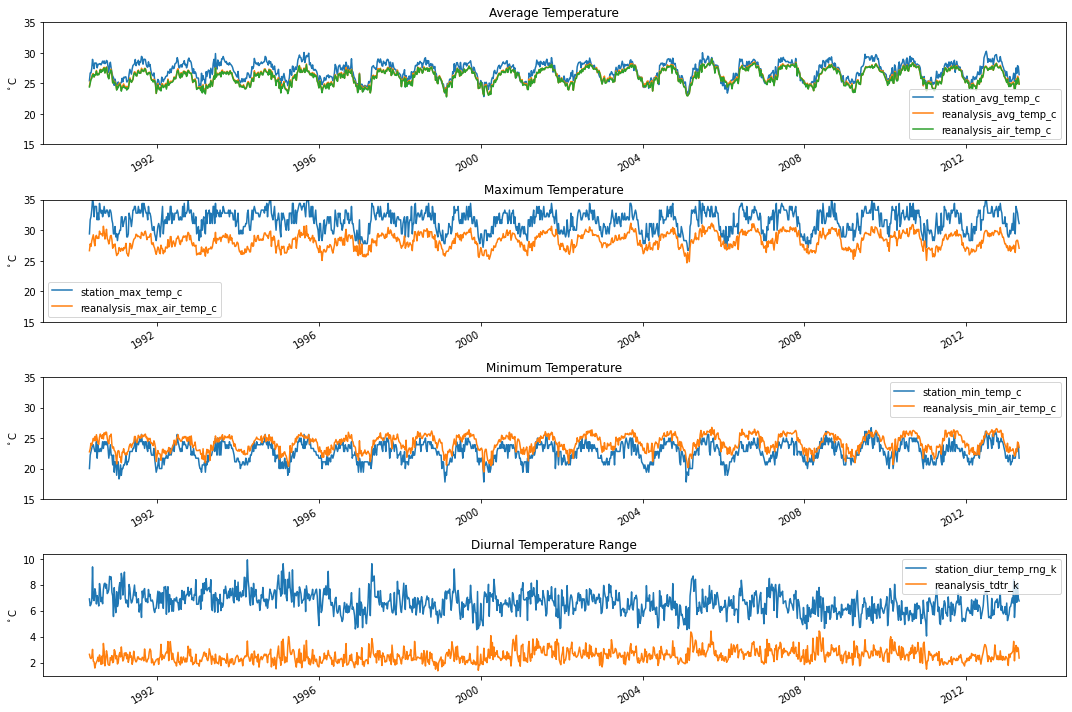

In [7]:
# Plot different temperature variables for SJ
fig, ax = plt.subplots(4, 1, figsize=(15,10), tight_layout=True)

sj_features[['station_avg_temp_c','reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(ax=ax[0])
ax[0].set(title='Average Temperature', ylabel=r'$^\circ$C', xlabel='', ylim=(15,35))

sj_features[['station_max_temp_c','reanalysis_max_air_temp_c']].plot(ax=ax[1])
ax[1].set(title='Maximum Temperature', ylabel=r'$^\circ$C', xlabel='', ylim=(15,35))

sj_features[['station_min_temp_c','reanalysis_min_air_temp_c']].plot(ax=ax[2])
ax[2].set(title='Minimum Temperature', ylabel=r'$^\circ$C', xlabel='', ylim=(15,35))

sj_features[['station_diur_temp_rng_k','reanalysis_tdtr_k']].plot(ax=ax[3])
ax[3].set(title='Diurnal Temperature Range', ylabel=r'$^\circ$C', xlabel='');

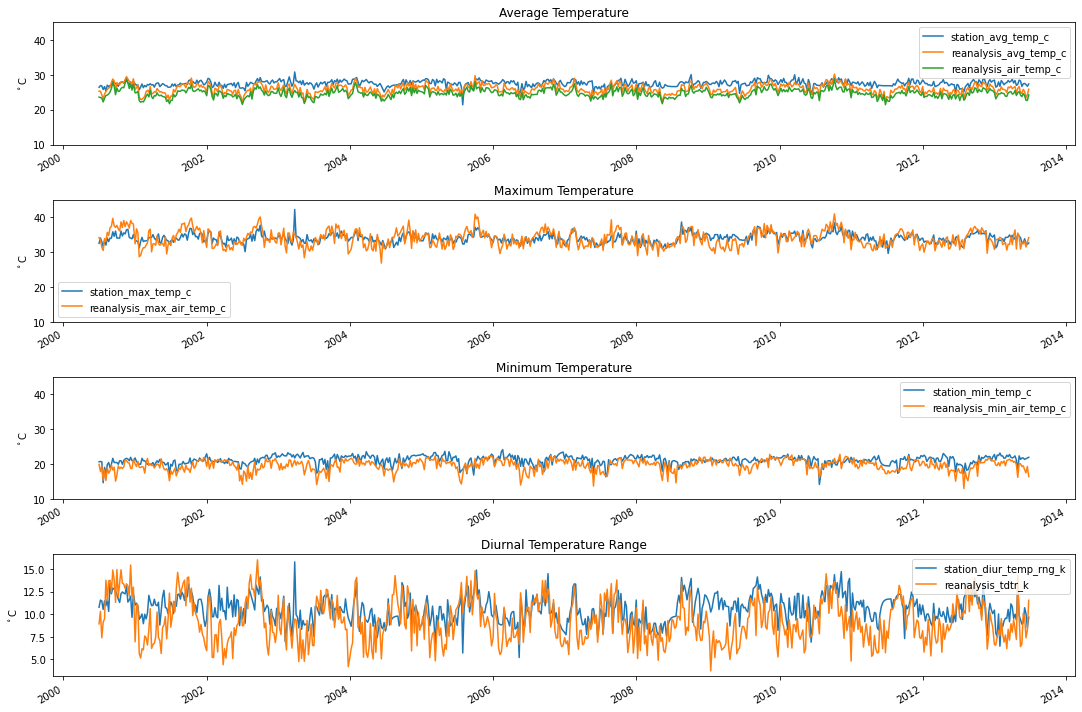

In [8]:
# Plot different temperature variables for IQ
fig, ax = plt.subplots(4, 1, figsize=(15,10), tight_layout=True)

iq_features[['station_avg_temp_c','reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(ax=ax[0], ylim=(10,45))
ax[0].set(title='Average Temperature', ylabel=r'$^\circ$C', xlabel='')

iq_features[['station_max_temp_c','reanalysis_max_air_temp_c']].plot(ax=ax[1], ylim=(10,45))
ax[1].set(title='Maximum Temperature', ylabel=r'$^\circ$C', xlabel='')

iq_features[['station_min_temp_c','reanalysis_min_air_temp_c']].plot(ax=ax[2], ylim=(10,45))
ax[2].set(title='Minimum Temperature', ylabel=r'$^\circ$C', xlabel='')

iq_features[['station_diur_temp_rng_k','reanalysis_tdtr_k']].plot(ax=ax[3])
ax[3].set(title='Diurnal Temperature Range', ylabel=r'$^\circ$C', xlabel='');

### Difference between reanalysis_avg_temp_c and reanalysis_air_temp_c

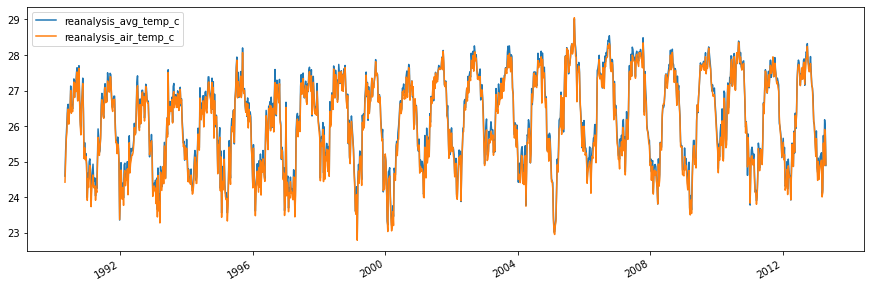

In [9]:
# Plot reanalysis_avg_temp_c and reanalysis_air_temp_c for SJ
sj_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(figsize=(15,5));

In [10]:
# compare 10 randomly selected values
sj_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].sample(10)

,reanalysis_avg_temp_c,reanalysis_air_temp_c
1998-10-08,27.592857,27.562857
2004-10-14,27.528571,27.358571
2013-02-12,24.878571,24.764286
2003-10-08,27.950000,27.782857
1991-01-15,24.507143,24.272857
2002-04-30,25.328571,25.387143
1999-04-09,24.942857,24.825714
2012-05-06,25.857143,25.814286
1999-10-29,26.885714,26.654286
2011-07-02,27.521429,27.491429


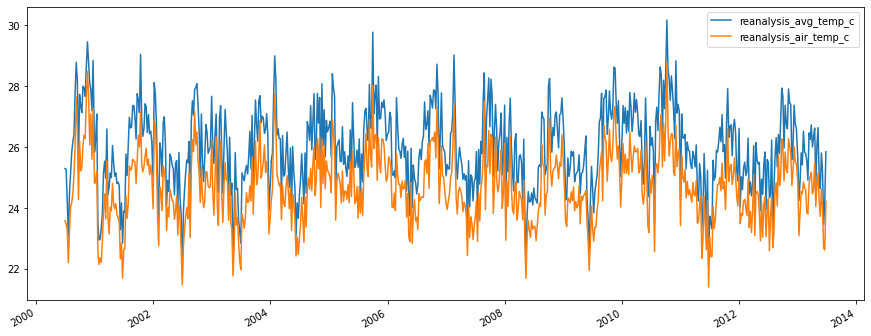

In [11]:
# Plot reanalysis_avg_temp_c and reanalysis_air_temp_c for IQ
iq_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].plot(figsize=(15,6));

In [12]:
# compare 10 randomly selected values
iq_features[['reanalysis_avg_temp_c', 'reanalysis_air_temp_c']].sample(10)

,reanalysis_avg_temp_c,reanalysis_air_temp_c
2007-11-19,25.221429,24.531429
2007-10-22,25.042857,23.821429
2011-03-26,25.700000,24.452857
2002-04-30,25.400000,24.258571
2012-09-16,26.828571,25.025714
2004-04-22,25.364286,24.630000
2012-02-26,26.300000,24.948571
2005-07-16,24.442857,23.838571
2010-08-20,27.742857,25.574286
2001-01-29,22.950000,22.147143


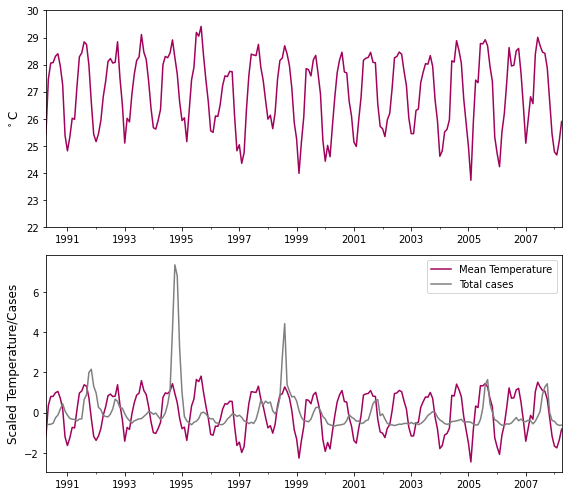

In [13]:
# plot mean temperature and cases for SJ
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

# first plot only with temperature on normal scale
sj_train_monthly_mean[['station_avg_temp_c']].plot(legend=False, ax=ax[0], color=colors['environmental']);
ax[0].set(ylim=(22, 30))
ax[0].set_ylabel(r'$^\circ$C', fontsize=12)
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=10)

# second plot with temperature and total_cases, both scaled
sc_df = std_scaler(sj_train_monthly_mean[['station_avg_temp_c', 'total_cases']])
sc_df.index = sj_train_monthly_mean.index
sc_df.plot(ax=ax[1], color=[colors['environmental'], colors['cases_background']], legend=False)
ax[1].legend(labels=['Mean Temperature', 'Total cases'], loc=1)
ax[1].set_ylabel('Scaled Temperature/Cases', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SJ_temperature_cases.png', dpi=200)

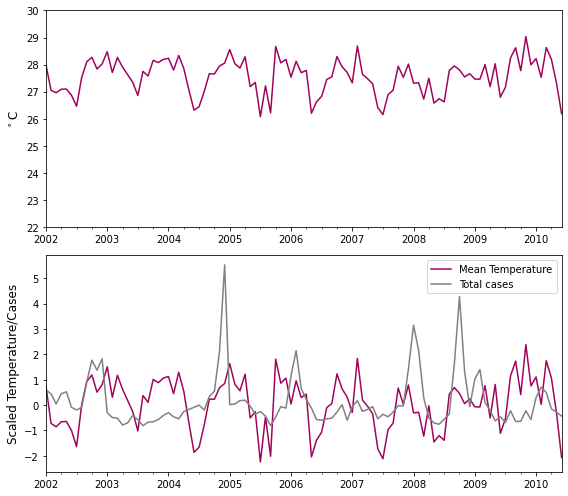

In [14]:
# plot mean temperature and cases for IQ
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

# first plot only with temperature on normal scale
iq_train_monthly_mean[['station_avg_temp_c']]['2002':].plot(legend=False, ax=ax[0], color=colors['environmental']);
ax[0].set(ylim=(22, 30))
ax[0].set_ylabel(r'$^\circ$C', fontsize=12)
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=10)

# second plot with temperature and total_cases, both scaled
sc_df = std_scaler(iq_train_monthly_mean[['station_avg_temp_c', 'total_cases']])
sc_df.index = iq_train_monthly_mean.index
sc_df = sc_df['2002':]
sc_df.plot(ax=ax[1], color=[colors['environmental'], colors['cases_background']], legend=False)
ax[1].legend(labels=['Mean Temperature', 'Total cases'], loc=1)
ax[1].set_ylabel('Scaled Temperature/Cases', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/IQ_temperature_cases.png', dpi=200)

### Average temperature in different years

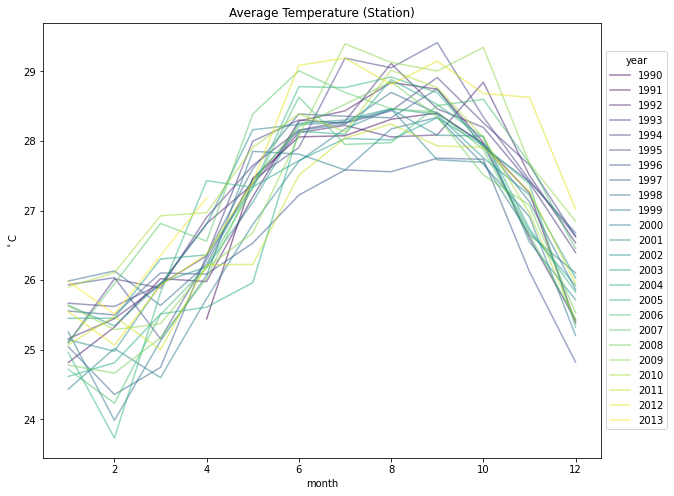

In [15]:
# plot yearly seasonality in temperature for SJ
fig, ax = plt.subplots(figsize=(10,8)) 

pd.pivot_table(data=sj_features[['year', 'month', 'station_avg_temp_c']], index='month', columns='year') \
    ['station_avg_temp_c'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Average Temperature (Station)', ylabel=r'$^\circ$C');

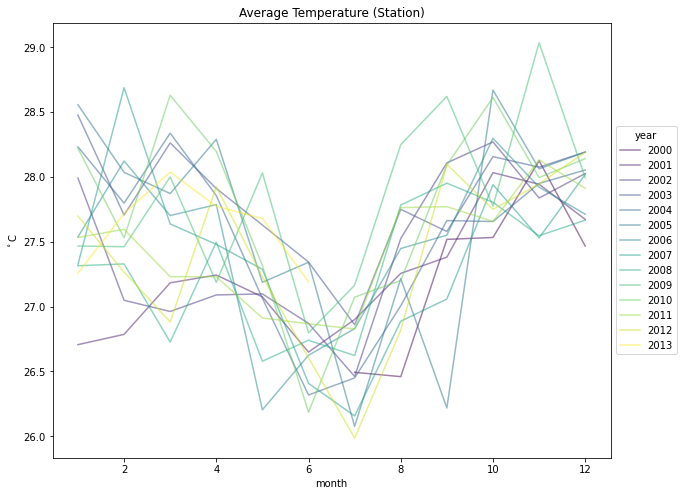

In [16]:
# plot yearly seasonality in temperature for IQ
fig, ax = plt.subplots(figsize=(10,8)) 

pd.pivot_table(data=iq_features[['year', 'month', 'station_avg_temp_c']], index='month', columns='year') \
    ['station_avg_temp_c'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='Average Temperature (Station)', ylabel=r'$^\circ$C');

### Conclusion Temperature
* `reanalysis_avg_temp_c` and `reanalysis_air_temp_c` in SJ almost similar, while in IQ little bit more diffenence (but same pattern)
* slightly different features for same substance (check which features are best correlated for models)
    * average temperature
    * min temperature
    * max temperature

## Environmental features: Precipitation
### Comparison of precipitation data from station and reanalysis

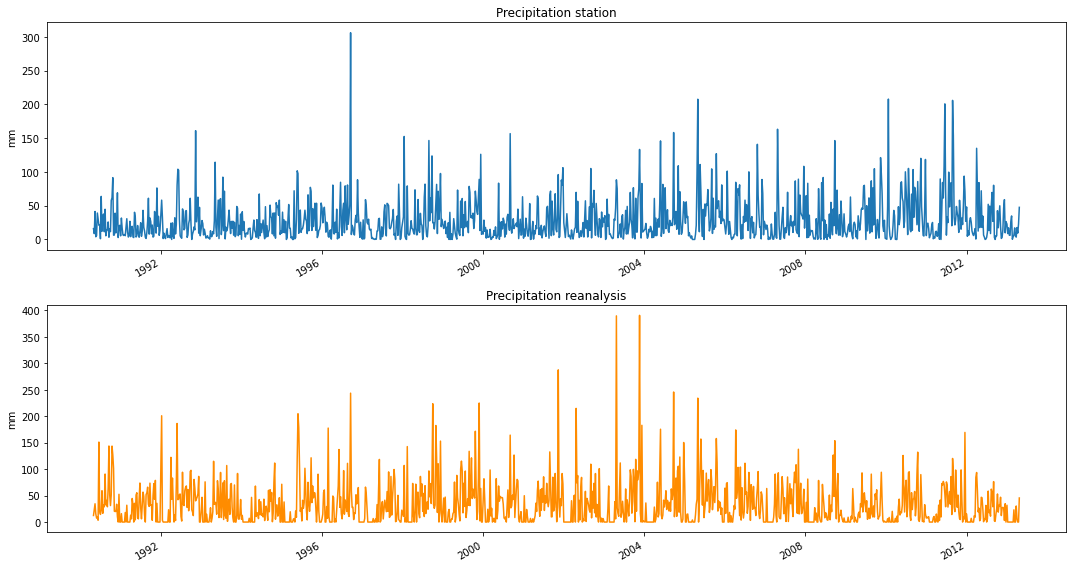

In [17]:
# Plot different precipitation variables for SJ
fig, ax = plt.subplots(2, 1, figsize=(15,8), tight_layout=True)

sj_features[['station_precip_mm']].plot(ax=ax[0], legend=False);
ax[0].set(title='Precipitation station', ylabel='mm', xlabel='');

sj_features[['reanalysis_sat_precip_amt_mm']].plot(ax=ax[1], legend=False, color='darkorange');
ax[1].set(title='Precipitation reanalysis', ylabel='mm', xlabel='');

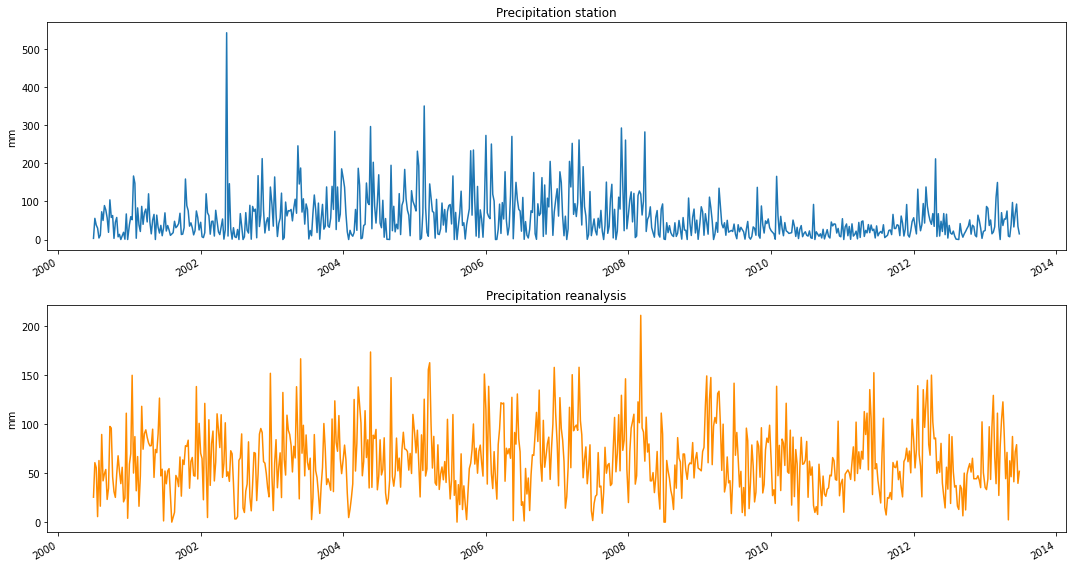

In [18]:
# Plot different precipitation variables for IQ
fig, ax = plt.subplots(2, 1, figsize=(15,8), tight_layout=True)

iq_features[['station_precip_mm']].plot(ax=ax[0], legend=False);
ax[0].set(title='Precipitation station', ylabel='mm', xlabel='');

iq_features[['reanalysis_sat_precip_amt_mm']].plot(ax=ax[1], legend=False, color='darkorange');
ax[1].set(title='Precipitation reanalysis', ylabel='mm', xlabel='');

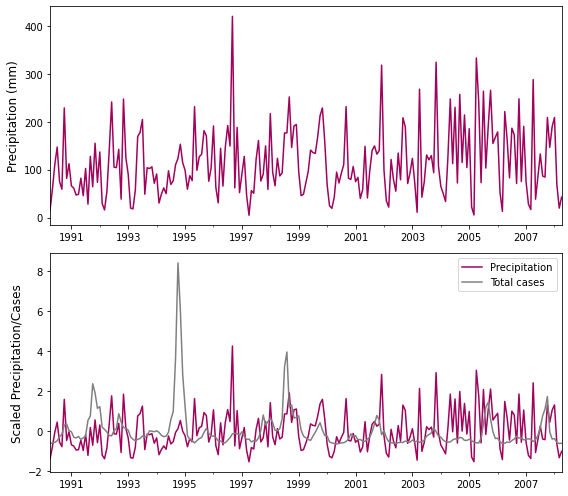

In [19]:
# plot cumulative precipitation and cases for SQ
fig, ax = plt.subplots(2, 1, figsize=(8, 7)) 

# first plot: only precipitation on normal scale
sj_train_monthly_sum[['station_precip_mm']].plot(legend=False, ax=ax[0], color=colors['environmental']);
ax[0].set_ylabel('Precipitation (mm)', fontsize=12)
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=10)

# second plot: precipitation with total cases, both scaled
sc_df = std_scaler(sj_train_monthly_sum[['station_precip_mm', 'total_cases']])
sc_df.index = sj_train_monthly_mean.index
sc_df.plot(ax=ax[1], color=[colors['environmental'], colors['cases_background']], legend=False)
ax[1].legend(labels=['Precipitation', 'Total cases'], loc=1)
ax[1].set_ylabel('Scaled Precipitation/Cases', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SJ_precipitation_cases.png', dpi=200)

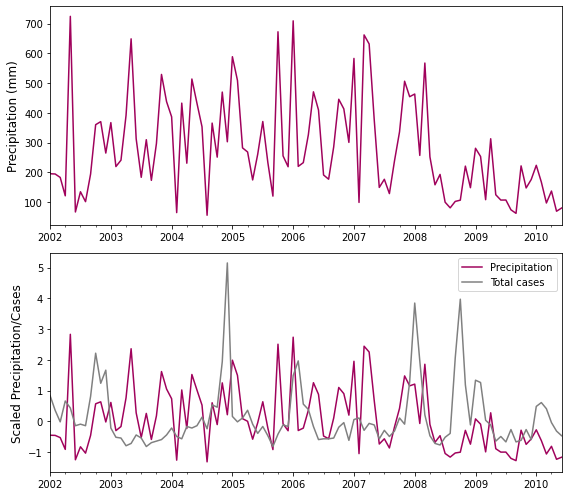

In [20]:
# plot cumulative precipitation and cases for IQ
fig, ax = plt.subplots(2, 1, figsize=(8, 7)) 

# first plot: only precipitation on normal scale
iq_train_monthly_sum[['station_precip_mm']]['2002':].plot(legend=False, ax=ax[0], color=colors['environmental']);
ax[0].set_ylabel('Precipitation (mm)', fontsize=12)
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=10)

# second plot: precipitation with total cases, both scaled
sc_df = std_scaler(iq_train_monthly_sum[['station_precip_mm', 'total_cases']])
sc_df.index = iq_train_monthly_mean.index
sc_df = sc_df['2002':]
sc_df.plot(ax=ax[1], color=[colors['environmental'], colors['cases_background']], legend=False)
ax[1].legend(labels=['Precipitation', 'Total cases'], loc=1)
ax[1].set_ylabel('Scaled Precipitation/Cases', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/IQ_precipitation_cases.png', dpi=200)

### Conclusion precipitation
* no clear pattern in SJ or IQ 
* difference between `reanalysis_sat_precip_amt_mm`/`precipitation_amt_mm` and `station_precip_mm` (check which features are best correlated for models)

## Environmental features: Humidity

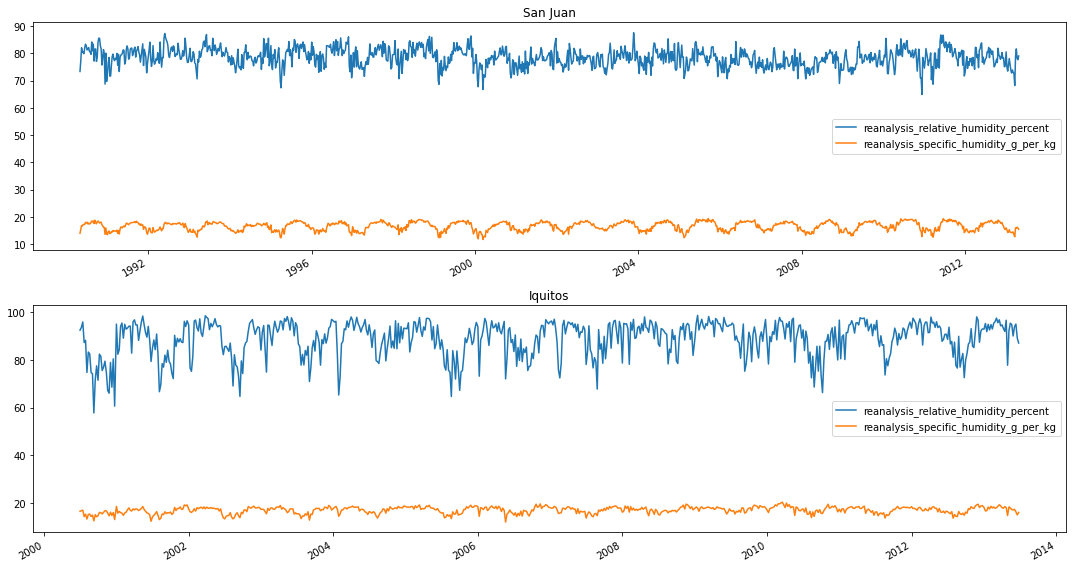

In [21]:
# plot the two different humidity variables for SJ and IQ
fig, ax = plt.subplots(2, 1, figsize=(15,8), tight_layout=True)

sj_features[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].plot(ax=ax[0]);
ax[0].set(title='San Juan', ylabel='', xlabel='');

iq_features[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg']].plot(ax=ax[1]);
ax[1].set(title='Iquitos', ylabel='', xlabel='');

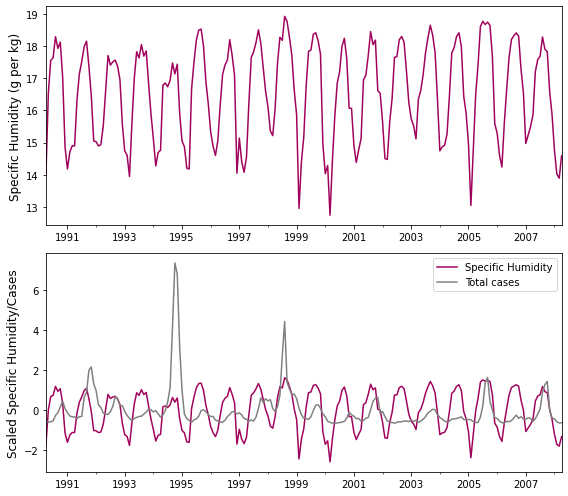

In [22]:
# plot mean specific humidity and cases for SJ
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

# first plot: only specific humidity on normal scale
sj_train_monthly_mean[['reanalysis_specific_humidity_g_per_kg']].plot(legend=False, ax=ax[0], color=colors['environmental']);
ax[0].set_ylabel('Specific Humidity (g per kg)', fontsize=12)
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=10)

# second plot: specific humidity with total cases, both scaled
sc_df = std_scaler(sj_train_monthly_mean[['reanalysis_specific_humidity_g_per_kg', 'total_cases']])
sc_df.index = sj_train_monthly_mean.index
sc_df.plot(ax=ax[1], color=[colors['environmental'], colors['cases_background']], legend=False)
ax[1].legend(labels=['Specific Humidity', 'Total cases'], loc=1)
ax[1].set_ylabel('Scaled Specific Humidity/Cases', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SJ_humidity_cases.png', dpi=200)

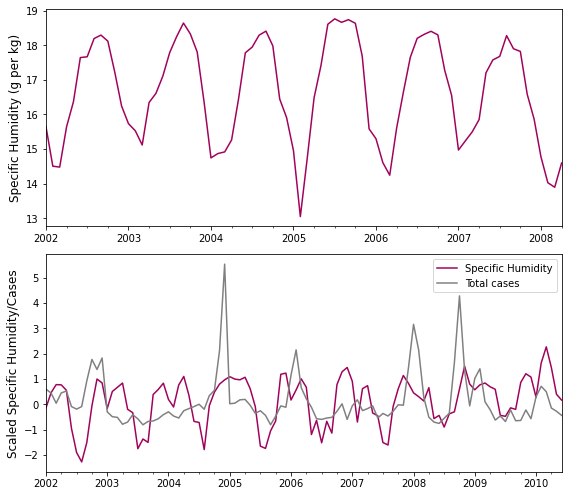

In [23]:
# plot mean specific humidity and cases for IQ
fig, ax = plt.subplots(2, 1, figsize=(8, 7))

# first plot: only specific humidity on normal scale
sj_train_monthly_mean[['reanalysis_specific_humidity_g_per_kg']]['2002':].plot(legend=False, ax=ax[0], color=colors['environmental']);
ax[0].set_ylabel('Specific Humidity (g per kg)', fontsize=12)
ax[0].set_xlabel('')
ax[0].tick_params(labelsize=10)

# second plot: specific humidity with total cases, both scaled
sc_df = std_scaler(iq_train_monthly_mean[['reanalysis_specific_humidity_g_per_kg', 'total_cases']])
sc_df.index = iq_train_monthly_mean.index
sc_df = sc_df['2002':]
sc_df.plot(ax=ax[1], color=[colors['environmental'], colors['cases_background']], legend=False)
ax[1].legend(labels=['Specific Humidity', 'Total cases'], loc=1)
ax[1].set_ylabel('Scaled Specific Humidity/Cases', fontsize=12)
ax[1].set_xlabel('')
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/IQ_humidity_cases.png', dpi=200)

### Conclusion humidity
* `reanalysis_specific_humidity_g_per_kg` affected by seasonality (clearly in SJ, more slightly in IQ)
* `reanalysis_relative_humidity_percent` in IQ slightly affected by seasonality, while in SJ affected by seasonality with a lot of noise

## Environmental features: Vegetation 
Satellite vegetation - Normalized difference vegetation index (NDVI)

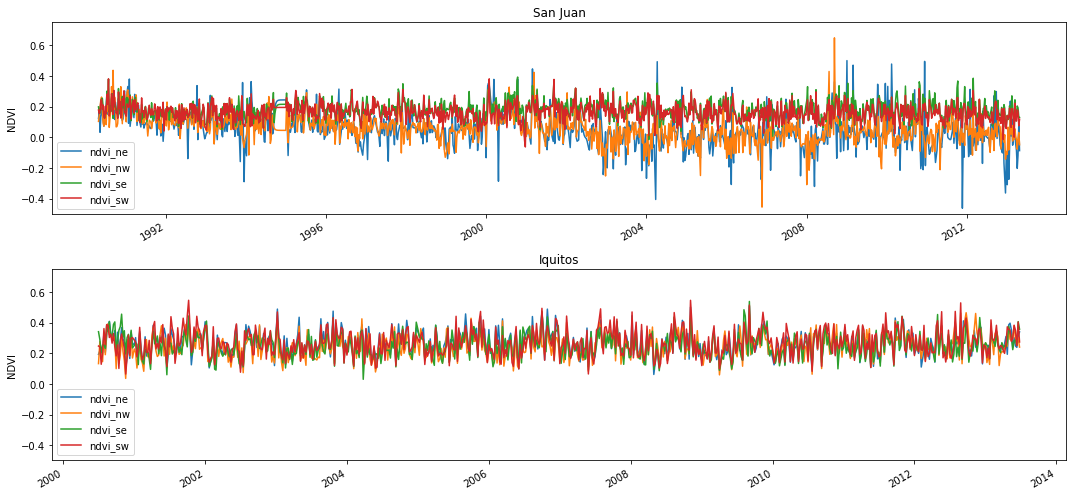

In [24]:
# Plot four different vegetation indicies for SJ and IQ
fig, ax = plt.subplots(2, 1, tight_layout=True)

sj_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(15,7), ax=ax[0]);
ax[0].set(title='San Juan', ylabel='NDVI', xlabel='', ylim=(-0.5,0.75));

iq_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].plot(figsize=(15,7), ax=ax[1]);
ax[1].set(title='Iquitos', ylabel='NDVI', xlabel='', ylim=(-0.5,0.75));

#### Vegetation index plottedwith rolling mean

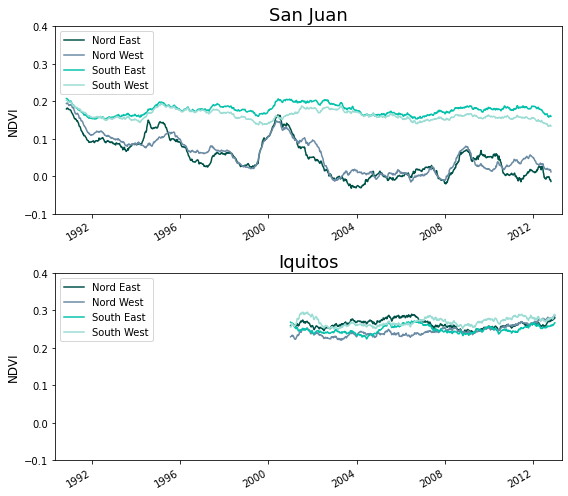

In [25]:
# generate a plot with rolling mean to get rid of the noise

# set the window for the rolling mean (prevent repeatedly setting the number below)
rolling_window = 52
fig, ax = plt.subplots(2, 1, tight_layout=True, figsize=(8, 7));

(
    sj_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]
    .assign(Nord_East = lambda df: df['ndvi_ne'].rolling(rolling_window, center=True).mean())
    .assign(Nord_West = lambda df: df['ndvi_nw'].rolling(rolling_window, center=True).mean())
    .assign(South_East = lambda df: df['ndvi_se'].rolling(rolling_window, center=True).mean())
    .assign(South_West = lambda df: df['ndvi_sw'].rolling(rolling_window, center=True).mean())
    .drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1)
    .plot(ax=ax[0], ylim=(-0.1,0.4), xlim=('1990-04-30','2013-04-23'), xlabel='', legend=False,
         color=['#005249', '#6b8ba4', '#06c2ac', '#9bdcd4'])
);
ax[0].legend(labels=['Nord East', 'Nord West', 'South East', 'South West'], loc=2)
ax[0].set_title('San Juan', fontsize=18)
ax[0].set_ylabel('NDVI', fontsize=12)
ax[0].tick_params(labelsize=10)

(
    iq_features[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']]
    .assign(Nord_East = lambda df: df['ndvi_ne'].rolling(rolling_window, center=True).mean())
    .assign(Nord_West = lambda df: df['ndvi_nw'].rolling(rolling_window, center=True).mean())
    .assign(South_East = lambda df: df['ndvi_se'].rolling(rolling_window, center=True).mean())
    .assign(South_West = lambda df: df['ndvi_sw'].rolling(rolling_window, center=True).mean())
    .drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis=1)
    .plot(ax=ax[1], ylim=(-0.1,0.4), xlim=('1990-04-30','2013-04-23'), xlabel='', legend=False,
         color=['#005249', '#6b8ba4', '#06c2ac', '#9bdcd4'])
);
ax[1].legend(labels=['Nord East', 'Nord West', 'South East', 'South West'], loc=2)
ax[1].set_title('Iquitos', fontsize=18)
ax[1].set_ylabel('NDVI', fontsize=12)
ax[1].tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SJIQ_vegetation.png', dpi=200)

---
## Target variable: Total dengue cases
### San Juan

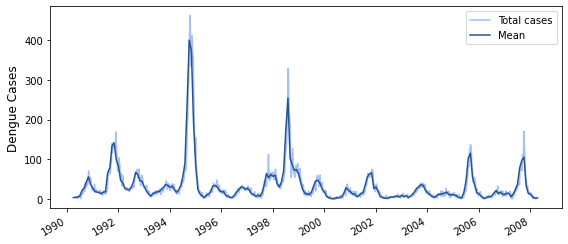

In [26]:
# plot total_cases for SJ
fig, ax = plt.subplots(figsize=(8, 3.5))

# plot cases and monthly mean number of cases per week
sj_train.total_cases.plot(ax=ax, color=colors['actual_weekly'])
sj_train_monthly_mean.total_cases.plot(ax=ax, color=colors['actual_monthly'])

#ax.set_title('San Juan', fontsize=18)
ax.set_ylabel('Dengue Cases', fontsize=12)
ax.set_xlabel('')
ax.tick_params(labelsize=10)
ax.legend(labels=['Total cases', 'Mean'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SJ_cases.png', dpi=200)

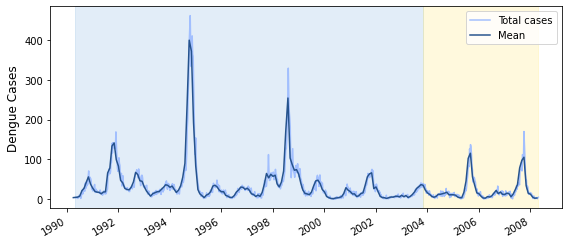

In [27]:
# same plot with a illustration for the train test split 
fig, ax = plt.subplots(figsize=(8, 3.5))
sj_train.total_cases.plot(ax=ax, color=colors['actual_weekly'])
sj_train_monthly_mean.total_cases.plot(ax=ax, color=colors['actual_monthly'])

# plot box from 1990 to 2003 to illustrate train set
ax.axvspan(xmin='1990-04-30', xmax='2003-10-29', color='#6fa8dc97', alpha=0.2)

# plot box from 2003 to 2008 to illustrate test set
ax.axvspan(xmin='2003-11-05', xmax='2008-04-22', color='#ffe559a1', alpha=0.2)

ax.set_ylabel('Dengue Cases', fontsize=12)
ax.set_xlabel('')
ax.tick_params(labelsize=10)
ax.legend(labels=['Total cases', 'Mean'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SJ_cases_train_test.png', dpi=200)

### Iquitos

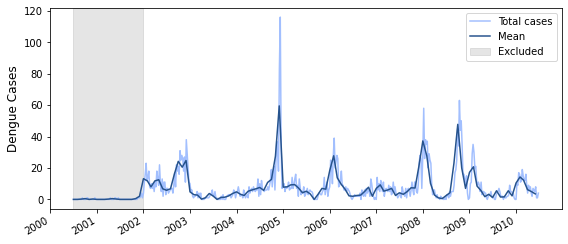

In [28]:
# plot total_cases for IQ
fig, ax = plt.subplots(figsize=(8, 3.5));

# plot cases and monthly mean number of cases per week
iq_train.total_cases.plot(ax=ax, color=colors['actual_weekly'])
iq_train_monthly_mean.total_cases.plot(ax=ax, color=colors['actual_monthly'])

# plot grey box from 2000 to 2002 (data excluded)
ax.axvspan(xmin='2000-07', xmax='2002', color='gray', alpha=0.2)

#ax.set_title('Iquitos', fontsize=18)
ax.set_ylabel('Dengue Cases', fontsize=12)
ax.set_xlabel('')
ax.tick_params(labelsize=10)
ax.legend(labels=['Total cases', 'Mean', 'Excluded'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/IQ_cases.png', dpi=200)

In [29]:
iq_train_cut = iq_train['2002':]
iq_train_monthly_mean_cut = iq_train_monthly_mean['2002':]

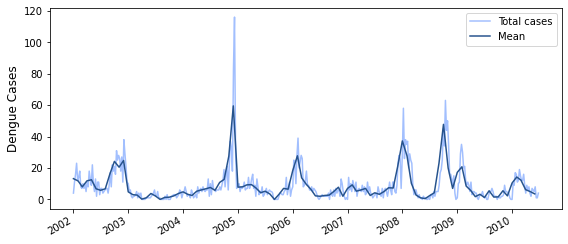

In [30]:
# plot total_cases for IQ without cases before 2002
fig, ax = plt.subplots(figsize=(8, 3.5));

# plot cases and monthly mean number of cases per week
iq_train_cut.total_cases.plot(ax=ax, color=colors['actual_weekly'])
iq_train_monthly_mean_cut.total_cases.plot(ax=ax, color=colors['actual_monthly'])

#ax.set_title('Iquitos', fontsize=18)
ax.set_ylabel('Dengue Cases', fontsize=12)
ax.set_xlabel('')
ax.tick_params(labelsize=10)
ax.legend(labels=['Total cases', 'Mean', 'Excluded'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/IQ_cases_cut.png', dpi=200)

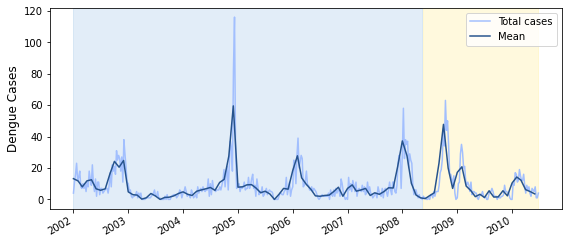

In [31]:
# plot total_cases for IQ without cases before 2002 
# with illustration for train-test split
fig, ax = plt.subplots(figsize=(8, 3.5));

# plot cases and monthly mean number of cases per week
iq_train_cut.total_cases.plot(ax=ax, color=colors['actual_weekly'])
iq_train_monthly_mean_cut.total_cases.plot(ax=ax, color=colors['actual_monthly'])

# plot box from 1990 to 2003 to illustrate train set
ax.axvspan(xmin='2002-01-01', xmax='2008-05-13', color='#6fa8dc97', alpha=0.2)

# plot box from 2003 to 2008 to illustrate test set
ax.axvspan(xmin='2008-05-20', xmax='2010-06-25', color='#ffe559a1', alpha=0.2)

#ax.set_title('Iquitos', fontsize=18)
ax.set_ylabel('Dengue Cases', fontsize=12)
ax.set_xlabel('')
ax.tick_params(labelsize=10)
ax.legend(labels=['Total cases', 'Mean'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/IQ_cases_cut_train_test.png', dpi=200)

---
# Climograph
For illustration of the climatic conditions in both cities, climographs for both cities are plotted. These included the monthly mean of the precipitation (blue line) as well as the air temperature (red line), accompained by the mean min and max air temperature (red dotted line). 

In [32]:
# function to get mean values of different parameters per month
def get_pivot_monthly_df(data=sj_features , features=['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']):
    """
    Creates within the function a pivot table for each given feature (index = month, column = year) of 
    which the mean per month is calculated.
    Returns dataframe with mean values for each month. 
    """
    mean_pivot_df = pd.DataFrame(columns=features, index=range(1,13))
    for feat in range(len(features)):
        pivot_df = pd.pivot_table(data=data[['year', 'month', features[feat]]], index='month', columns='year')
        for month in range(0,12):
            mean_pivot_df.iloc[month, feat] = (pivot_df.iloc[month,:].mean())
    mean_pivot_df.index = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    return mean_pivot_df

In [33]:
# get the mean values of temperatures and precipitation per month for SJ
mean_sj = get_pivot_monthly_df(data=sj_features, 
                               features=['station_avg_temp_c', 'station_max_temp_c', 
                                         'station_min_temp_c', 'station_precip_mm'])

# get the mean values of temperatures and precipitation per month for IQ
mean_iq = get_pivot_monthly_df(data=iq_features, 
                               features=['station_avg_temp_c', 'station_max_temp_c', 
                                         'station_min_temp_c', 'station_precip_mm'])

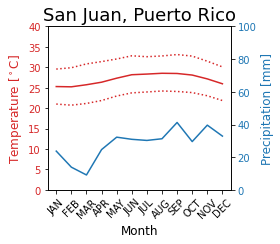

In [34]:
# plot SJ 
fig, ax1 = plt.subplots(figsize=(4,3.5))

# first axis: temperature
color = 'tab:red'
ax1.set_title('San Juan, Puerto Rico', fontsize=18)
ax1.set_xlabel('Month', fontsize=12)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel(r'Temperature [$^\circ$C]', color=color, fontsize=12)
ax1.set_ylim(0,40)
ax1.tick_params(labelsize=10)
ax1.plot(mean_sj.index, mean_sj['station_avg_temp_c'], color=color)
ax1.plot(mean_sj.index, mean_sj['station_max_temp_c'], color=color, ls=':')
ax1.plot(mean_sj.index, mean_sj['station_min_temp_c'], color=color, ls=':')
ax1.tick_params(axis='y', labelcolor=color)

# second axis: precipitation
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue' 
ax2.set_ylabel('Precipitation [mm]', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(mean_sj.index, mean_sj['station_precip_mm'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)
ax2.tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/SanJuan_climatogram.png', dpi=200)

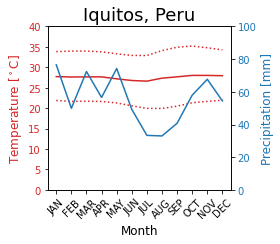

In [35]:
# plot IQ 
fig, ax1 = plt.subplots(figsize=(4, 3.5))

# first axis: temperature
color = 'tab:red'
ax1.set_title('Iquitos, Peru', fontsize=18)
ax1.set_xlabel('Month', fontsize=12)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_ylabel(r'Temperature [$^\circ$C]', color=color, fontsize=12)
ax1.set_ylim(0,40)
ax1.tick_params(labelsize=10)
ax1.plot(mean_iq.index, mean_iq['station_avg_temp_c'], color=color)
ax1.plot(mean_iq.index, mean_iq['station_max_temp_c'], color=color, ls=':')
ax1.plot(mean_iq.index, mean_iq['station_min_temp_c'], color=color, ls=':')
ax1.tick_params(axis='y', labelcolor=color)

# second axis: precipitation
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue' 
ax2.set_ylabel('Precipitation [mm]', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(mean_iq.index, mean_iq['station_precip_mm'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)
ax2.tick_params(labelsize=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.savefig('plots/Iquitos_climatogram.png', dpi=200)